In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


def calculate_portoflio_returns(returns, weights):
    '''
    Calculates the portfolio returns based on the weights of the strategies

    Parameters
    ----------
    strategies : list
        List of dictionaries containing the strategies' returns and volatility
        weights : list

    Returns
    -------
    portfolio_returns : float
    '''
    return np.dot(returns, weights)


def calculate_portoflio_volatility(volatilities, weights, correlation_matrix):
    # Write docstring here
    '''
    Calculates the portfolio volatility based on the weights of the strategies

    Parameters
    ----------
    strategies : list
        List of dictionaries containing the strategies' returns and volatility
        weights : list
        correlation_matrix : list

    Returns
    -------
    portfolio_volatility : float
    '''

    portfolio_volatility = np.sqrt(np.dot((np.dot(weights, np.dot(np.diag(volatilities), np.dot(correlation_matrix, np.diag(volatilities))))), np.transpose(weights)))

    return portfolio_volatility

# A real example

In [2]:
strategies = {
    'alpha18': {'return': 16.4, 'volatility': 5.72, 'sharpe': 2.96},
    'alpha7': {'return': 25.3, 'volatility': 7.14, 'sharpe': 3.48}
}

correlation_matrix = np.array(
    [[1  , 0.61],
     [0.61,   1]])

weights = np.ones(len(strategies)) / len(strategies)


for name, strategy in strategies.items():
    print("Return: ", strategy['return'], "Volatility: ", strategy['volatility'], "Sharpe: ", strategy['sharpe'])

returns = np.array([strategy['return'] for strategy in strategies.values()])
volatilities = np.array([strategy['volatility'] for strategy in strategies.values()])

print ("---------- Portfolio ----------")
weights = np.ones(len(strategies)) / len(strategies)
portfolio_return = calculate_portoflio_returns(returns, weights)
portfolio_volatility = calculate_portoflio_volatility(volatilities, weights, correlation_matrix)
portfolio_sharpe = portfolio_return / portfolio_volatility

print (f"Return: {portfolio_return:.2f}, Volatility: {portfolio_volatility:.2f}, Sharpe: {portfolio_sharpe:.2f}")

Return:  16.4 Volatility:  5.72 Sharpe:  2.96
Return:  25.3 Volatility:  7.14 Sharpe:  3.48
---------- Portfolio ----------
Return: 20.85, Volatility: 5.78, Sharpe: 3.61


# Different weights and their sharpe

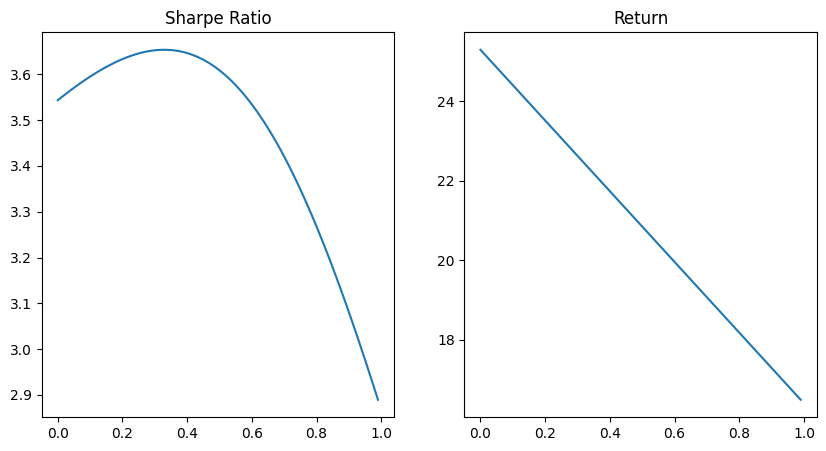

Max sharpe 3.65
Weights: 0.33, 0.67


In [3]:
sharpe_holder = []
return_holder = []

x = [i/100 for i in range(100)]
for i in x:
    weights = np.array([i, 1-i])

    portfolio_return = calculate_portoflio_returns(returns, weights)
    portfolio_volatility = calculate_portoflio_volatility(volatilities, weights, correlation_matrix)
    portfolio_sharpe = portfolio_return / portfolio_volatility

    sharpe_holder.append(portfolio_sharpe)
    return_holder.append(portfolio_return)

# make two subfigures and plot the two functions
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(x, sharpe_holder)
axes[0].set_title('Sharpe Ratio')

axes[1].plot(x, return_holder)
axes[1].set_title('Return')

plt.show()

print (f"Max sharpe {np.max(sharpe_holder):.2f}")
print (f"Weights: {x[np.argmax(sharpe_holder)]:.2f}, {1-x[np.argmax(sharpe_holder)]:.2f}")

# Finding the portfolio volatility and return with the optimal weight

In [7]:
weights = np.array([0.33, 0.67])

portfolio_return = calculate_portoflio_returns(returns, weights)
portfolio_volatility = calculate_portoflio_volatility(volatilities, weights, correlation_matrix)
portfolio_sharpe = portfolio_return / portfolio_volatility

print (f"Return: {portfolio_return*100:.2f}, Volatility: {portfolio_volatility*100:.2f}, Sharpe: {portfolio_sharpe:.2f}")

Return: 22.36, Volatility: 6.12, Sharpe: 3.65


# Using python libraries to find the max sharpe

In [5]:
# pip install PyPortfolioOpt
from pypfopt.efficient_frontier import EfficientFrontier

volatilities = volatilities / 100
returns = returns / 100

# Convert volatility to covariance matrix using correlation matrix
covariance_matrix = np.outer(volatilities, volatilities) * correlation_matrix

# Define the risk-free rate
risk_free_rate = 0.0

# Define the number of strategies
num_strategies = len(returns)

ef = EfficientFrontier(returns, covariance_matrix)
weights = ef.max_sharpe(risk_free_rate)

expected_return, volatility, sharpe_ratio = ef.portfolio_performance(risk_free_rate=risk_free_rate)

# Print the optimized portfolio performance
print("\nPortfolio Expected Return: {:.2%}".format(expected_return))
print("Portfolio Volatility: {:.2%}".format(volatility))
print("Portfolio Sharpe Ratio: {:.4f}".format(sharpe_ratio))


Portfolio Expected Return: 22.37%
Portfolio Volatility: 6.12%
Portfolio Sharpe Ratio: 3.6536
